In [10]:
import random

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import utils,losses
from tensorflow.keras.datasets import mnist,fashion_mnist,cifar100,cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda, Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adadelta
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import cv2

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
num_classes=10

In [3]:
def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input)
    #x = Dropout(0.1)(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    #x = Dropout(0.1)(x)
    #x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    #x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    #x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    #for 2D view
    x = Dense(  num_classes,activation="softmax")(x)
    return Model(input, x)

In [4]:
my_cnn=create_base_network((28,28,1))
my_cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6422656   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512 

In [20]:
# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

y_train = y_train.astype("float32")
y_test  = y_test.astype("float32")
x_train /= 255
x_test /= 255
input_shape = (x_train.shape[1],x_train.shape[1],1)
#input_shape = x_train.shape[1:]
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test  = utils.to_categorical(y_test, num_classes)
print(input_shape)

(28, 28, 1)


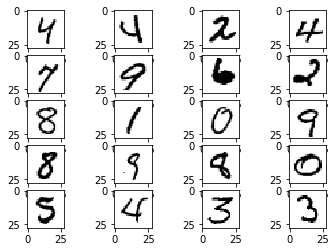

In [21]:
for i in range(20):
    plt.subplot(5,4,i+1)
    idx=random.randrange(0,x_train.shape[0])
    plt.imshow(x_train[idx,:,:,0], cmap="gray_r")
plt.show()

In [6]:
my_cnn.compile(loss=losses.categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [7]:
epochs=10
batch_size=1000
my_cnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 2.2967 - accuracy: 0.1428 - val_loss: 2.2922 - val_accuracy: 0.1687
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 2.2868 - accuracy: 0.2054 - val_loss: 2.2811 - val_accuracy: 0.2500
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 2.2747 - accuracy: 0.3066 - val_loss: 2.2682 - val_accuracy: 0.3461
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 2.2603 - accuracy: 0.3956 - val_loss: 2.2520 - val_accuracy: 0.4195
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 2.2419 - accuracy: 0.4452 - val_loss: 2.2315 - val_accuracy: 0.4544
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 2.2185 - accuracy: 0.4721 - val_loss: 2.2050 - val_accuracy: 0.4707
Epoch 7/10
60000/60000 [==============================]